In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from datetime import timedelta
import re

plt.style.use('ggplot')

#### Loading purchase behaviour and transaction datasets

In [66]:
purchase = pd.read_csv('Purchase_Behaviour.csv')
trans = pd.read_excel('Transaction_data.xlsx')

## 1. Transaction Data

In [67]:
trans.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [68]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


<b>The date column is in an integer format. We need to change this to a date format.</b>

In [69]:
# Making a datetime column from DATE column

trans['date_modified'] = pd.to_datetime(trans['DATE'] , origin='1899-12-30', unit='d').dt.to_pydatetime()

In [70]:
trans_id_dedupped = trans['TXN_ID'].drop_duplicates()

In [71]:
print('Total TXN_IDs before dropping duplicates : {}'.format(trans.shape[0]))
print('Total TXN_IDs after dropping duplicates : {}'.format(trans_id_dedupped.shape[0]))

Total TXN_IDs before dropping duplicates : 264836
Total TXN_IDs after dropping duplicates : 263127


In [72]:
# Quantity of products sold at the chain of stores

products = trans['PROD_NAME'].value_counts().reset_index()

In [73]:
products.rename(columns={'index' : 'PROD_NAME', 'PROD_NAME' : 'Qty'}, inplace=True)

In [74]:
products

,PROD_NAME,Qty
0,Kettle Mozzarella Basil & Pesto 175g,3304
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
2,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
3,Tyrrells Crisps Ched & Chives 165g,3268
4,Cobs Popd Sea Salt Chips 110g,3265
5,Kettle 135g Swt Pot Sea Salt,3257
6,Tostitos Splash Of Lime 175g,3252
7,Infuzions Thai SweetChili PotatoMix 110g,3242
8,Smiths Crnkle Chip Orgnl Big Bag 380g,3233
9,Thins Potato Chips Hot & Spicy 175g,3229


### Checking for null values in the transaction dataset

In [75]:
trans.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
date_modified     0
dtype: int64

There are no null values in the dataset !

<b>Statistics of the metric columns in the transaction dataset</b>

In [76]:
trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In the above statistics we find an <b>outlier</b> in the <b>PROD_QTY</b> column. We see the max PROD_QTY value is 200 while till 75% percentile the value is 2. We need to investigate this transactions.

In [77]:
# Filter transactions where PROD_QTY = 200

trans[trans['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date_modified
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-19
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-20


We find that one customer have done two transactions of purchase of Dorito Corn Chp Supreme 380 g with PROD_QTY 200.

The purchase transactions donot seem to be ordinary retail transaction. The customer may have purchased the product in bulk amount for commercial purposes, hence we will drop this customer records.

In [78]:
# Fetching the index in dataframe for that customer 226000
# Index to drop from dataframe

cust_to_drop = trans[trans['LYLTY_CARD_NBR']==226000].index

In [79]:
trans.drop(cust_to_drop, inplace=True)

<b>Number of transactions happened over time</b>

In [80]:
trans_over_time = trans[['date_modified']].groupby(['date_modified']).size().reset_index().sort_values(['date_modified'])

In [81]:
trans_over_time.rename(columns={0:'Num_Transactions'}, inplace=True)

In [82]:
trans_over_time

,date_modified,Num_Transactions
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
5,2018-07-06,762
6,2018-07-07,750
7,2018-07-08,696
8,2018-07-09,749
9,2018-07-10,705


In [83]:
print("Total number of dates on which transactions happened : {}".format(trans_over_time.shape[0]))

Total number of dates on which transactions happened : 364


In [84]:
print("Max Transaction Date : {}".format(np.max(trans['date_modified'])))
print("Min Transaction Date : {}".format(np.min(trans['date_modified'])))
days_between = np.max(trans['date_modified'])-np.min(trans['date_modified'])+timedelta(days=1)
print("Days between Max and Min Transaction dates : {}".format(days_between.days))

Max Transaction Date : 2019-06-30 00:00:00
Min Transaction Date : 2018-07-01 00:00:00
Days between Max and Min Transaction dates : 365


<b>Over the year transactions happened on 364 days out of 365 days, we need to find out the day when there were no transaction. On one day there were no transactions</b>

In [85]:
# Creating a date sequence

start = datetime.strptime("2018-07-01", "%Y-%m-%d")
end = datetime.strptime("2019-06-30", "%Y-%m-%d")
date_generated = [start + timedelta(days=x) for x in range(0, (end-start+timedelta(1)).days)]

In [86]:
date_seq = pd.DataFrame(date_generated)

In [87]:
date_seq.rename(columns={0:'Date'}, inplace=True)

In [88]:
missing_date_trans = pd.merge(date_seq, trans_over_time, left_on='Date', right_on='date_modified', how='left')

In [89]:
missing_date_trans[missing_date_trans['Num_Transactions'].isnull()]

,Date,date_modified,Num_Transactions
177,2018-12-25,NaT,NaN


On <b> Christmas</b> there were no transactions. This may be due to national / festive holiday for the stores.

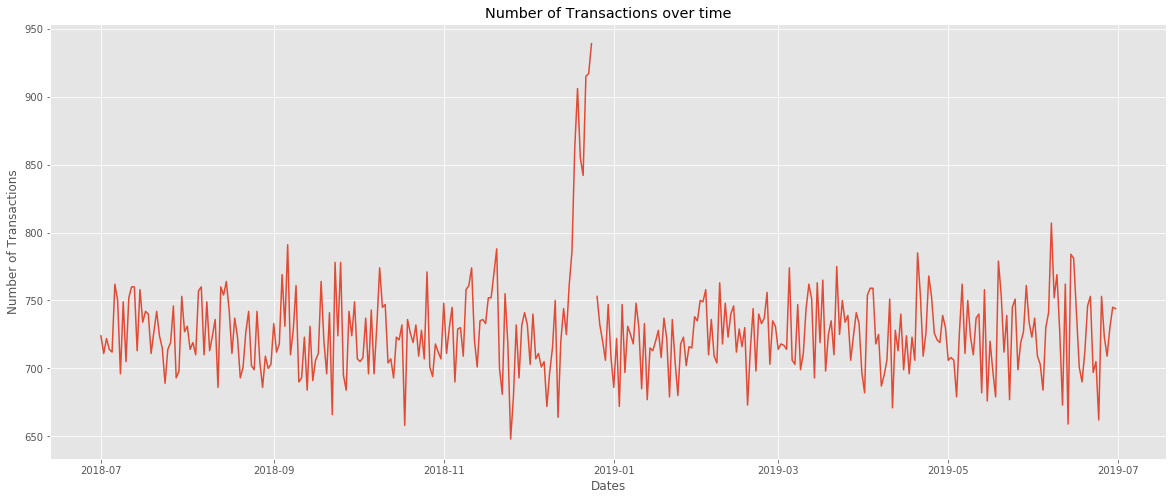

In [90]:
# Plot to visualize the number of transactions over time

plt.figure(figsize=(20,8))
plt.plot(missing_date_trans['Date'], missing_date_trans['Num_Transactions'])
plt.xlabel("Dates")  
plt.ylabel("Number of Transactions")  
plt.title("Number of Transactions over time")  
plt.show()

<b>We can see that there is an increase in purchases in December and a break in late December.</b> We need to zoom in <b> Decembers sales / transactions </b>for the chain of stores.

In [91]:
start = datetime.strptime("2018-12-01", "%Y-%m-%d")
end = datetime.strptime("2018-12-31", "%Y-%m-%d")
december_dates = (missing_date_trans['Date'] >= start) & (missing_date_trans['Date'] <= end)

In [92]:
december_trans = missing_date_trans.loc[december_dates]

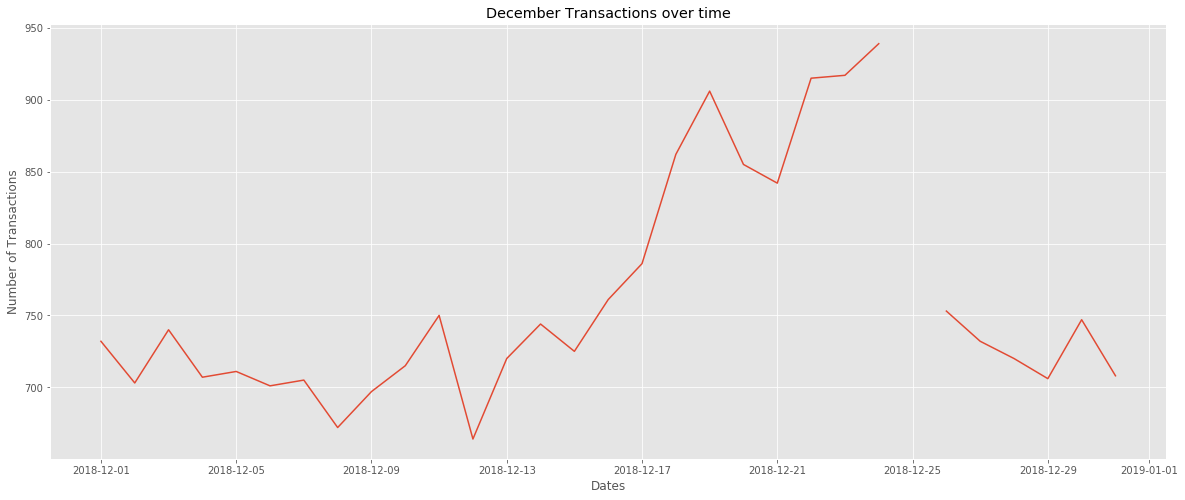

In [93]:
# Plot to visualize the number of transactions over time in December

plt.figure(figsize=(20,8))
plt.plot(december_trans['Date'], december_trans['Num_Transactions'])
plt.xlabel("Dates")  
plt.ylabel("Number of Transactions")  
plt.title("December Transactions over time")  
plt.show()

An increase in purchases is observed in December that leads upto Christmas and there are zero sales in Christmas itself. The reason for 0 Sales on Chirstmas being shops are closed on Christmas day.

The data has no outliers now. We will create a feature <b>pack_size</b> by extracting the numbers from PROD_NAME column to get more insights about the products which the customers tend to purchase

In [94]:
# Pack Size

def extract_pack_size(cols):
    pack = cols[0]
    
    # Regukar expressions to extract digits 
    
    list_match = re.findall(r'\d+',pack.lower())
    if len(list_match)==0:
        return '0'
    else :
        return re.findall(r'\d+',pack)[0]

In [95]:
# Creating pack_size feature from PROD_NAME

trans['pack_size'] = trans[['PROD_NAME']].apply(extract_pack_size, axis=1)

In [96]:
trans = trans.astype({'pack_size' : int})

<b> Statistics of pack size of products purchase from the retail stores</b>

In [97]:
trans['pack_size'].describe()

count    264834.000000
mean        182.425512
std          64.325148
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: pack_size, dtype: float64

<b> We need to check whether the pack sizes are sensible and also have a look at the most popular pack size in the retail stores</b>

In [98]:
trans_by_pack_size = trans[['pack_size']].groupby(['pack_size']).size().reset_index()

In [99]:
trans_by_pack_size.rename(columns={0: 'Num_Transactions'}, inplace=True)

In [100]:
trans_by_pack_size.head(10)

,pack_size,Num_Transactions
0,70,1507
1,90,3008
2,110,22387
3,125,1454
4,134,25102
5,135,3257
6,150,43131
7,160,2970
8,165,15297
9,170,19983


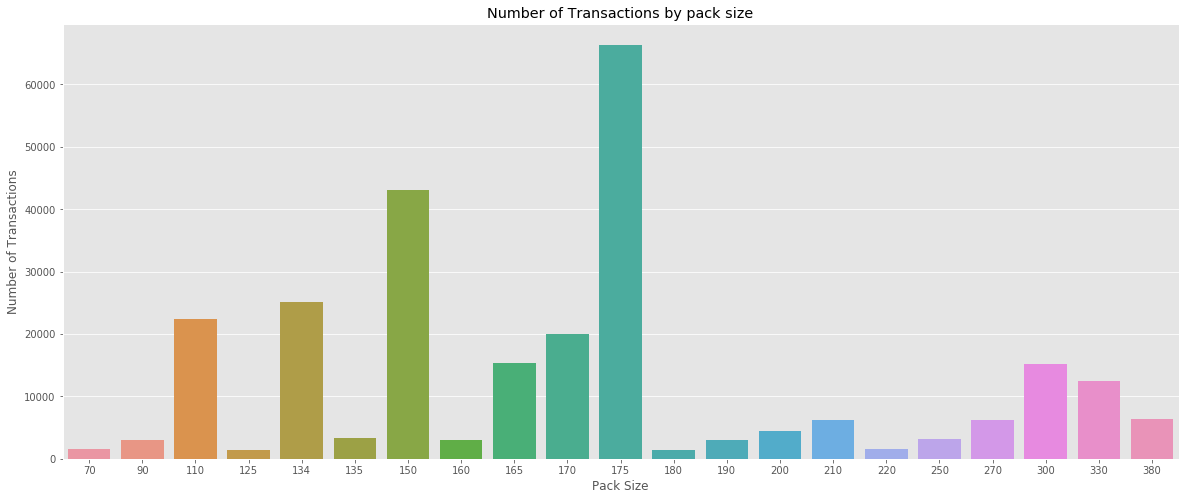

In [119]:
#plot a histogram of PACK_SIZE

plt.figure(figsize=(20,8))

sns.barplot(x='pack_size', y='Num_Transactions', data=trans_by_pack_size)
plt.xlabel("Pack Size")  
plt.ylabel("Number of Transactions")  
plt.title("Number of Transactions by pack size")  
plt.show()

The largest pack size is 380 and the smallest pack is 70

Pack sizes created look reasonable and now to create brands, we can use the first word in PROD_NAME to
work out the brand name

In [102]:
def get_brand(cols):
    prod_name = cols[0]
    
    brand_name = re.findall(r'[A-Za-z]+\s', prod_name.strip())
    if len(brand_name)==0:
        return 'None'
    else:
        return brand_name[0]
    

In [103]:
trans['brand'] = trans[['PROD_NAME']].apply(get_brand, axis=1)

In [104]:
# Checking the brands

trans[['PROD_NAME', 'brand']].drop_duplicates()

,PROD_NAME,brand
0,Natural Chip Compny SeaSalt175g,Natural
1,CCs Nacho Cheese 175g,CCs
2,Smiths Crinkle Cut Chips Chicken 170g,Smiths
3,Smiths Chip Thinly S/Cream&Onion 175g,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle
5,Old El Paso Salsa Dip Tomato Mild 300g,Old
6,Smiths Crinkle Chips Salt & Vinegar 330g,Smiths
7,Grain Waves Sweet Chilli 210g,Grain
8,Doritos Corn Chip Mexican Jalapeno 150g,Doritos
9,Grain Waves Sour Cream&Chives 210G,Grain


In [105]:
print('Total Records in Transaction Dataset : {}'.format(trans.shape[0]))

Total Records in Transaction Dataset : 264834


# 2. Purchase Behaviour of Customers

In [106]:
# Checking the customer data

purchase.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [107]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
LYLTY_CARD_NBR      72637 non-null int64
LIFESTAGE           72637 non-null object
PREMIUM_CUSTOMER    72637 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


<b>Checking for missing values in the dataset</b>

In [108]:
purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [109]:
print('Total Number of records : {}'.format(purchase.shape[0]))
print('Total Number of unique customers : {}'.format(purchase['LYLTY_CARD_NBR'].drop_duplicates().shape[0]))

Total Number of records : 72637
Total Number of unique customers : 72637


There are no duplicate customers in the dataset

In [110]:
# Checking LIFESTAGE column

purchase['LIFESTAGE'].value_counts().reset_index()

,index,LIFESTAGE
0,RETIREES,14805
1,OLDER SINGLES/COUPLES,14609
2,YOUNG SINGLES/COUPLES,14441
3,OLDER FAMILIES,9780
4,YOUNG FAMILIES,9178
5,MIDAGE SINGLES/COUPLES,7275
6,NEW FAMILIES,2549


In [111]:
# Checking PREMIUM_CUSTOMER column

purchase['PREMIUM_CUSTOMER'].value_counts().reset_index()

,index,PREMIUM_CUSTOMER
0,Mainstream,29245
1,Budget,24470
2,Premium,18922


There are no data issues in the customer data. Hence we can <b> merge the customer (purchase) data and the transactions dataset</b> 

In [112]:
data = pd.merge(trans, purchase, left_on = 'LYLTY_CARD_NBR', right_on='LYLTY_CARD_NBR', how='left')

In [113]:
data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date_modified,pack_size,brand,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,2019-05-19,300,Old,MIDAGE SINGLES/COUPLES,Budget
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,2019-05-16,330,Smiths,MIDAGE SINGLES/COUPLES,Budget
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,2019-05-16,210,Grain,MIDAGE SINGLES/COUPLES,Budget
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,2018-08-20,150,Doritos,MIDAGE SINGLES/COUPLES,Budget
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,2018-08-18,210,Grain,MIDAGE SINGLES/COUPLES,Budget


In [114]:
data.drop(columns={'DATE'}, inplace=True)

In [115]:
print('Total Transactions :{}'.format(trans.shape[0]))
print('Total records in data :{}'.format(data.shape[0]))

Total Transactions :264834
Total records in data :264834


In [116]:
data[data['TXN_ID'].isnull()]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date_modified,pack_size,brand,LIFESTAGE,PREMIUM_CUSTOMER


In [117]:
data.isnull().sum()

STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
date_modified       0
pack_size           0
brand               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no missing values in the data set. Hence we can export the data into a <b>csv</b> file for further analysis.

In [118]:
# Exporting the data into a csv file

data.to_csv('Customer_Purchase_Behaviour_data.csv', index=False)